In [1]:
url='https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt'

In [12]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy import stats
from scipy.spatial.distance import cdist
import seaborn as sns

In [3]:
# reading the data from url
df=pd.read_csv(url)

In [4]:
df

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [5]:
# Deleting unrequired column
del df['Unnamed: 0']

In [6]:
# Renaming the column name which is misspelt
df.rename({'Living.Room':'Livingroom'},axis=1,inplace=True)

In [7]:
df

,Sqft,Floor,TotalFloor,Bedroom,Livingroom,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [8]:
# Checking for null values
df.isnull().sum()

Sqft          0
Floor         0
TotalFloor    0
Bedroom       0
Livingroom    0
Bathroom      0
Price         0
dtype: int64

In [9]:
# describe
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Livingroom,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [13]:
# Dealing with outliers using z-score
z = np.abs(stats.zscore(df)) # z-score for each entry


df_o = df[(z < 3).all(axis=1)].reset_index(drop=True)  # removing entries above threshold of z-score 3



In [14]:
df.shape,df_o.shape

((645, 7), (608, 7))

In [15]:
df_o

,Sqft,Floor,TotalFloor,Bedroom,Livingroom,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
603,1359.156,7,15,3,2,2,45000
604,377.148,4,10,1,1,1,24800
605,740.064,13,14,1,1,1,45000
606,1707.840,3,14,3,2,2,65000


In [16]:
# Scaling using Standard scaler
scaler=StandardScaler()
df_o_scaled = scaler.fit_transform(df_o)
df_o_scaled

array([[-0.42671271, -1.1029462 , -0.75886491, ...,  0.44150012,
         0.44722506,  0.15093818],
       [ 1.10409925, -0.16984144, -0.75886491, ...,  0.44150012,
         0.44722506,  0.72251637],
       [-0.48931097, -0.16984144, -0.75886491, ...,  0.44150012,
        -1.32998302,  0.00804364],
       ...,
       [-1.12667506,  2.31843792,  0.77108727, ..., -1.99879144,
        -1.32998302, -0.45636364],
       [ 0.42120916, -0.79191128,  0.77108727, ...,  0.44150012,
         0.44722506,  0.25810909],
       [-0.10803067,  0.14119348, -0.75886491, ...,  0.44150012,
        -1.32998302, -0.77787637]])

In [17]:
# Finding optimal number of clusters

inertias=[]
mapping1={}
mapping2={}
K=range(1,25)

array=np.array(df_o).reshape(df_o.shape[0],-1)

for k in K:
    kmeanModel=KMeans(n_clusters=k)
    kmeanModel.fit(array)
    inertias.append(kmeanModel.inertia_)
    mapping1[k]=sum(np.min(cdist(array,kmeanModel.cluster_centers_,'euclidean'),axis=1))/array.shape[0]
    mapping2[k]=kmeanModel.inertia_

D:\Users\ADMIN pc3\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


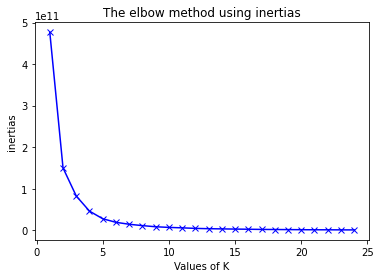

In [18]:
plt.plot(K,inertias,'bx-')
plt.xlabel('Values of K')
plt.ylabel('inertias')
plt.title('The elbow method using inertias')
plt.show()

At k=5 elbow is created so optimum clusters are 5

In [19]:
# storing cluster to which house belong within data
kmeans=KMeans(n_clusters=5)
df_o['Cluster']=kmeans.fit_predict(df_o)
df_o['Cluster']=df_o['Cluster'].astype('category')

In [20]:
df_o

,Sqft,Floor,TotalFloor,Bedroom,Livingroom,Bathroom,Price,Cluster
0,1177.698,2,7,2,2,2,62000,4
1,2134.800,5,7,4,2,2,78000,4
2,1138.560,5,7,2,2,1,58000,0
3,1458.780,2,7,3,2,2,45000,0
4,967.776,11,14,3,2,2,45000,0
...,...,...,...,...,...,...,...,...
603,1359.156,7,15,3,2,2,45000,0
604,377.148,4,10,1,1,1,24800,2
605,740.064,13,14,1,1,1,45000,0
606,1707.840,3,14,3,2,2,65000,4


<AxesSubplot:xlabel='Sqft', ylabel='Price'>

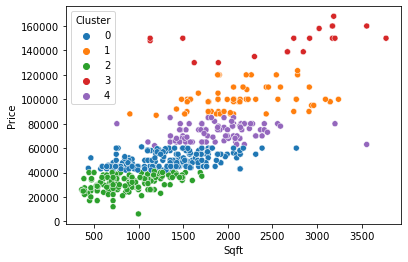

In [21]:
# Cluster Visualization
sns.scatterplot(data=df_o,x='Sqft',y='Price',hue='Cluster')

<AxesSubplot:xlabel='Sqft', ylabel='Price'>

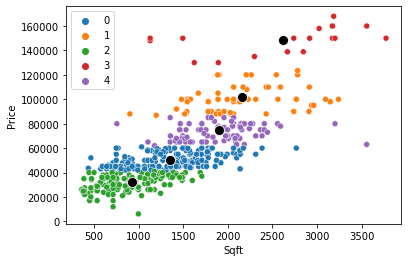

In [22]:
# Visualization along with Centroids
data=pd.DataFrame(df_o,columns=('Sqft','Price','Cluster'))

kmeans=KMeans(n_clusters=5)
kmeans.fit(data)
centroids=kmeans.cluster_centers_

sns.scatterplot(data=data,x='Sqft',y='Price',hue='Cluster')
sns.scatterplot(data=centroids,x=centroids[:,0],y=centroids[:,1],color='black',s=100)